## Importing Libraries


In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

## Test set Image Processing


In [8]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'C:/Users/Matto/Downloads/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 17572 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

## Loading Model

In [11]:
cnn = tf.keras.models.load_model('trained_plant_disease_model.keras')

## Visualising and Performing Prediction on Single image


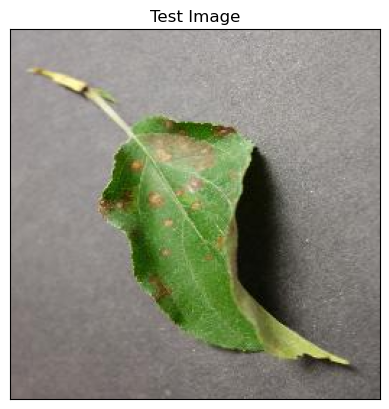

In [24]:
#Test Image Visualization
import cv2
image_path = 'C:/Users/Matto/Downloads/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/test/test/AppleCedarRust3.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

## Testing Model


In [27]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 711ms/step


In [30]:
print(predictions)


[[3.94266664e-07 2.91557399e-06 9.98599470e-01 1.85934130e-08
  2.20902202e-05 2.23822761e-04 3.74917120e-09 2.55178156e-06
  6.38155750e-09 2.65740709e-07 3.21063642e-09 1.72932229e-08
  1.24421003e-05 2.09079851e-10 5.35599232e-10 7.78473108e-08
  5.04783122e-04 5.61110865e-05 1.07390006e-04 1.59449537e-05
  1.18621433e-08 1.02541705e-07 1.94759281e-07 1.57069348e-06
  1.37152523e-09 5.89732885e-09 2.59280512e-07 4.37278977e-08
  3.31685878e-05 2.53972007e-06 1.09674670e-06 1.26156453e-06
  1.77759841e-06 8.22735089e-08 1.85079669e-04 4.54917000e-07
  2.22583491e-04 1.53970120e-06]]


In [32]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

2


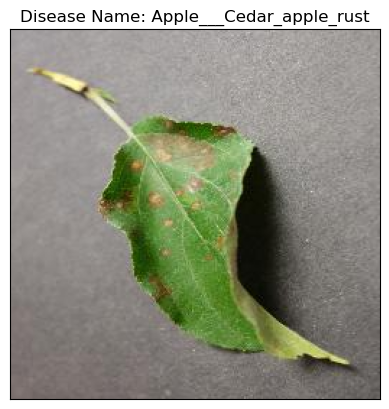

In [34]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

## Save model 

In [81]:
cnn.save('C:/Users/Matto/Documents/Test_plant.keras')  # Sauvegarde du modèle